# Creating and Backtesting SMA Strategies

## Getting the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [2]:
df = pd.read_csv("eurusd.csv", parse_dates = ["Date"], index_col = "Date")

In [3]:
df

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4275 entries, 2004-01-01 to 2020-06-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   4275 non-null   float64
dtypes: float64(1)
memory usage: 66.8 KB


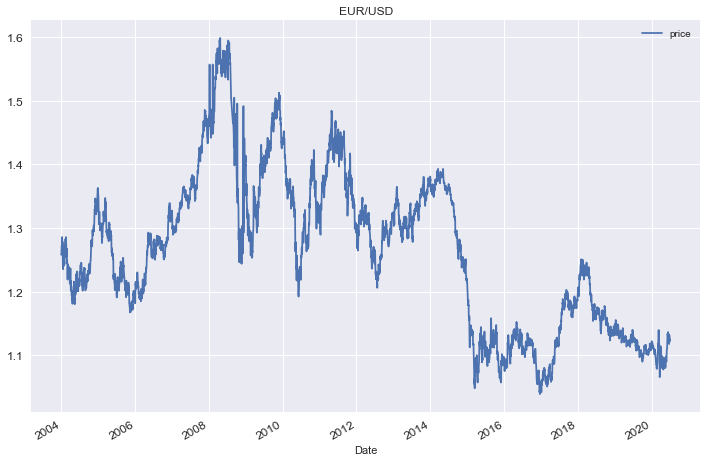

In [5]:
df.plot(figsize = (12, 8), title = "EUR/USD", fontsize = 12)
plt.show()

In [6]:
df["returns"] = np.log(df.div(df.shift(1)))

In [7]:
df

,price,returns
Date,,
2004-01-01,1.258194,NaN
2004-01-02,1.258194,0.000000
2004-01-05,1.268698,0.008313
2004-01-06,1.272103,0.002681
2004-01-07,1.264095,-0.006315
...,...,...
2020-06-24,1.131235,0.002892
2020-06-25,1.125087,-0.005449
2020-06-26,1.122208,-0.002562


## A simple Buy and Hold "Strategy"

In [8]:
df.dropna(inplace = True)

In [9]:
df

,price,returns
Date,,
2004-01-02,1.258194,0.000000
2004-01-05,1.268698,0.008313
2004-01-06,1.272103,0.002681
2004-01-07,1.264095,-0.006315
2004-01-08,1.277498,0.010547
...,...,...
2020-06-24,1.131235,0.002892
2020-06-25,1.125087,-0.005449
2020-06-26,1.122208,-0.002562


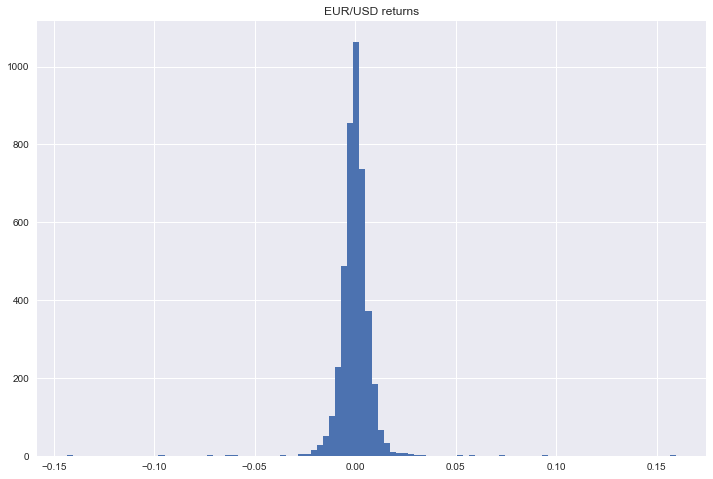

In [10]:
df.returns.hist(bins = 100, figsize = (12, 8))
plt.title("EUR/USD returns")
plt.show()

In [11]:
df.returns.sum()

-0.11214302770699758

In [12]:
np.exp(df.returns.sum())

0.8939163935445148

In [13]:
df.price[-1] / df.price[0]

0.8939163935445141

In [14]:
df.returns.cumsum().apply(np.exp)

Date
2004-01-02    1.000000
2004-01-05    1.008348
2004-01-06    1.011055
2004-01-07    1.004690
2004-01-08    1.015343
                ...   
2020-06-24    0.899094
2020-06-25    0.894208
2020-06-26    0.891920
2020-06-29    0.892221
2020-06-30    0.893916
Name: returns, Length: 4274, dtype: float64

In [15]:
df["creturns"] = df.returns.cumsum().apply(np.exp)

In [16]:
df

,price,returns,creturns
Date,,,
2004-01-02,1.258194,0.000000,1.000000
2004-01-05,1.268698,0.008313,1.008348
2004-01-06,1.272103,0.002681,1.011055
2004-01-07,1.264095,-0.006315,1.004690
2004-01-08,1.277498,0.010547,1.015343
...,...,...,...
2020-06-24,1.131235,0.002892,0.899094
2020-06-25,1.125087,-0.005449,0.894208
2020-06-26,1.122208,-0.002562,0.891920


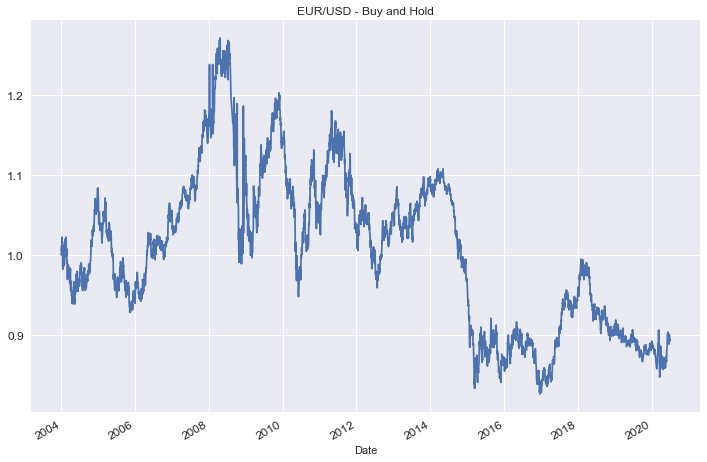

In [17]:
df.creturns.plot(figsize = (12, 8), title = "EUR/USD - Buy and Hold", fontsize = 12)
plt.show()

## More Performance Metrics

In [18]:
df

,price,returns,creturns
Date,,,
2004-01-02,1.258194,0.000000,1.000000
2004-01-05,1.268698,0.008313,1.008348
2004-01-06,1.272103,0.002681,1.011055
2004-01-07,1.264095,-0.006315,1.004690
2004-01-08,1.277498,0.010547,1.015343
...,...,...,...
2020-06-24,1.131235,0.002892,0.899094
2020-06-25,1.125087,-0.005449,0.894208
2020-06-26,1.122208,-0.002562,0.891920


In [19]:
df.creturns.iloc[-1] # absolute Performance 

0.8939163935445149

In [20]:
df.returns.sum() # absolute Performance

-0.11214302770699758

In [21]:
df.describe()

,price,returns,creturns
count,4274.000000,4274.000000,4274.000000
mean,1.262336,-0.000026,1.003292
std,0.122233,0.007593,0.097150
min,1.039047,-0.143324,0.825824
25%,1.145548,-0.003370,0.910470
50%,1.269205,0.000000,1.008751
75%,1.348909,0.003361,1.072099
max,1.598798,0.159632,1.270709


__annualized mean return and risk__

In [22]:
df.returns.mean() * 252 # mean return

-0.0066120830561917105

In [23]:
df.returns.std() * np.sqrt(252) # risk

0.12054120479431393

__maximum drawdown__

In [24]:
df

,price,returns,creturns
Date,,,
2004-01-02,1.258194,0.000000,1.000000
2004-01-05,1.268698,0.008313,1.008348
2004-01-06,1.272103,0.002681,1.011055
2004-01-07,1.264095,-0.006315,1.004690
2004-01-08,1.277498,0.010547,1.015343
...,...,...,...
2020-06-24,1.131235,0.002892,0.899094
2020-06-25,1.125087,-0.005449,0.894208
2020-06-26,1.122208,-0.002562,0.891920


In [25]:
df["cummax"] = df.creturns.cummax()

In [26]:
df

,price,returns,creturns,cummax
Date,,,,
2004-01-02,1.258194,0.000000,1.000000,1.000000
2004-01-05,1.268698,0.008313,1.008348,1.008348
2004-01-06,1.272103,0.002681,1.011055,1.011055
2004-01-07,1.264095,-0.006315,1.004690,1.011055
2004-01-08,1.277498,0.010547,1.015343,1.015343
...,...,...,...,...
2020-06-24,1.131235,0.002892,0.899094,1.270709
2020-06-25,1.125087,-0.005449,0.894208,1.270709
2020-06-26,1.122208,-0.002562,0.891920,1.270709


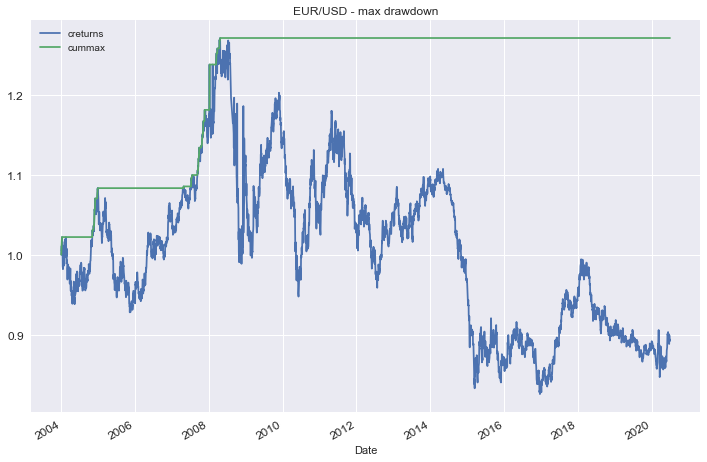

In [27]:
df[["creturns", "cummax"]].dropna().plot(figsize = (12, 8), title = "EUR/USD - max drawdown", fontsize = 12)
plt.show()

In [28]:
drawdown = df["cummax"] - df["creturns"]
drawdown

Date
2004-01-02    0.000000
2004-01-05    0.000000
2004-01-06    0.000000
2004-01-07    0.006365
2004-01-08    0.000000
                ...   
2020-06-24    0.371615
2020-06-25    0.376500
2020-06-26    0.378788
2020-06-29    0.378488
2020-06-30    0.376792
Length: 4274, dtype: float64

In [29]:
drawdown.max() # maximum drawdown

0.4448840569933439

In [30]:
drawdown.idxmax()

Timestamp('2016-12-21 00:00:00')

## Defining an SMA Crossover Strategy

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [32]:
data = pd.read_csv("eurusd.csv", parse_dates = ["Date"], index_col = "Date")

In [33]:
data

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [34]:
sma_s = 50
sma_l = 200

In [35]:
data.price.rolling(50).mean()

Date
2004-01-01         NaN
2004-01-02         NaN
2004-01-05         NaN
2004-01-06         NaN
2004-01-07         NaN
                ...   
2020-06-24    1.101794
2020-06-25    1.102486
2020-06-26    1.103213
2020-06-29    1.103931
2020-06-30    1.104695
Name: price, Length: 4275, dtype: float64

In [36]:
data["SMA_S"] = data.price.rolling(sma_s).mean()

In [37]:
data["SMA_L"] = data.price.rolling(sma_l).mean()

In [38]:
data

,price,SMA_S,SMA_L
Date,,,
2004-01-01,1.258194,NaN,NaN
2004-01-02,1.258194,NaN,NaN
2004-01-05,1.268698,NaN,NaN
2004-01-06,1.272103,NaN,NaN
2004-01-07,1.264095,NaN,NaN
...,...,...,...
2020-06-24,1.131235,1.101794,1.103430
2020-06-25,1.125087,1.102486,1.103540
2020-06-26,1.122208,1.103213,1.103627


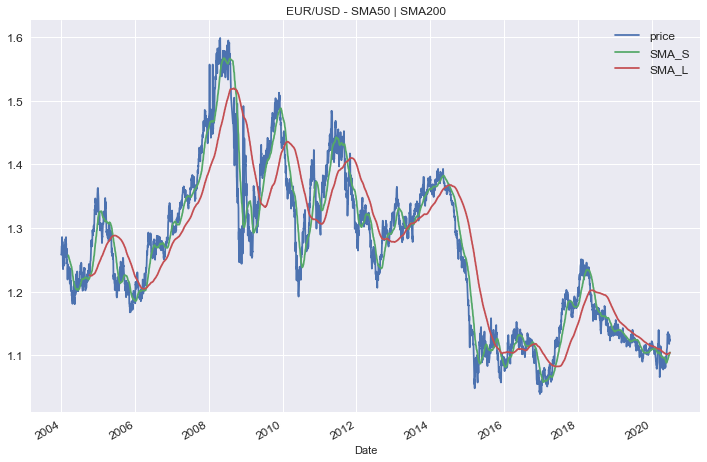

In [39]:
data.plot(figsize = (12, 8), title = "EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [40]:
data.dropna(inplace = True)

In [41]:
data

,price,SMA_S,SMA_L
Date,,,
2004-10-06,1.228094,1.221318,1.226222
2004-10-07,1.229906,1.221840,1.226081
2004-10-08,1.241003,1.222628,1.225995
2004-10-11,1.238405,1.223352,1.225843
2004-10-12,1.232104,1.223888,1.225643
...,...,...,...
2020-06-24,1.131235,1.101794,1.103430
2020-06-25,1.125087,1.102486,1.103540
2020-06-26,1.122208,1.103213,1.103627


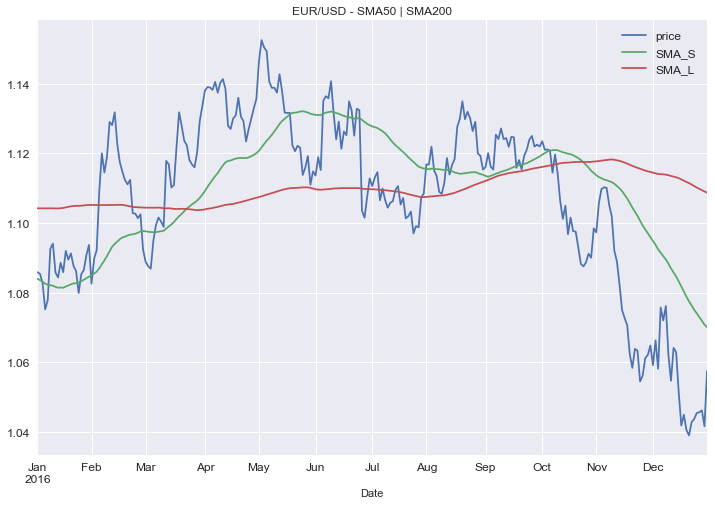

In [42]:
data.loc["2016"].plot(figsize = (12, 8), title = "EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [43]:
data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1 )

In [44]:
data

,price,SMA_S,SMA_L,position
Date,,,,
2004-10-06,1.228094,1.221318,1.226222,-1
2004-10-07,1.229906,1.221840,1.226081,-1
2004-10-08,1.241003,1.222628,1.225995,-1
2004-10-11,1.238405,1.223352,1.225843,-1
2004-10-12,1.232104,1.223888,1.225643,-1
...,...,...,...,...
2020-06-24,1.131235,1.101794,1.103430,-1
2020-06-25,1.125087,1.102486,1.103540,-1
2020-06-26,1.122208,1.103213,1.103627,-1


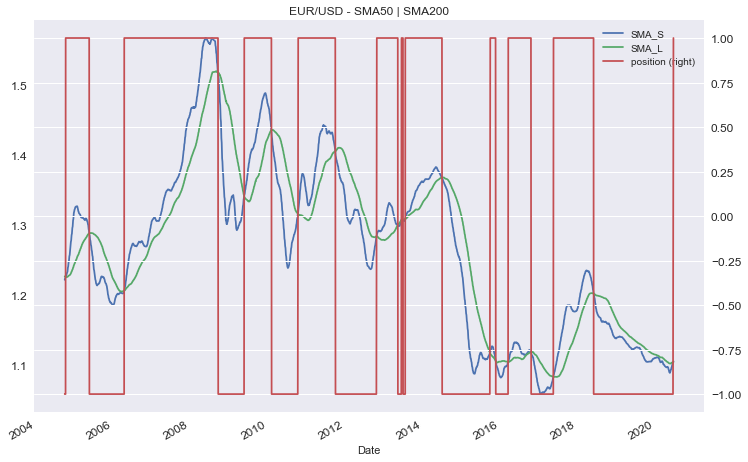

In [45]:
data.loc[:, ["SMA_S", "SMA_L", "position"]].plot(figsize = (12, 8), fontsize = 12, secondary_y = "position",
                                                title = "EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l))
plt.show()

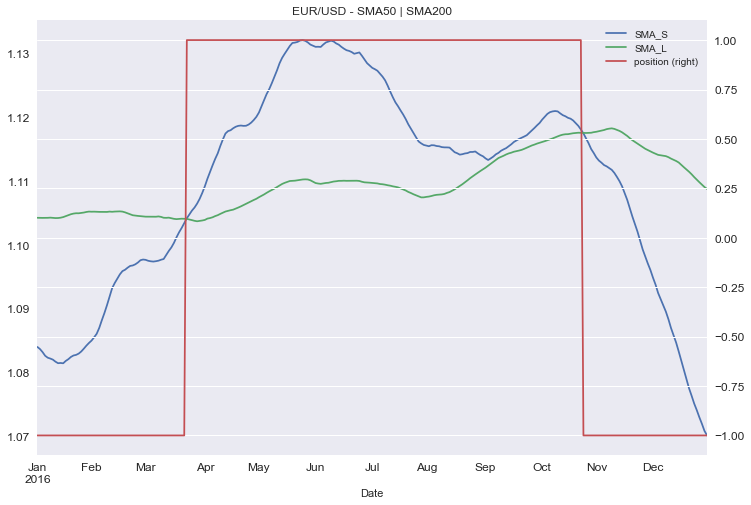

In [46]:
data.loc["2016", ["SMA_S", "SMA_L", "position"]].plot(figsize = (12, 8), fontsize = 12, secondary_y = "position",
                                                     title = "EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l))
plt.show()

## Vectorized Strategy Backtesting

In [47]:
data

,price,SMA_S,SMA_L,position
Date,,,,
2004-10-06,1.228094,1.221318,1.226222,-1
2004-10-07,1.229906,1.221840,1.226081,-1
2004-10-08,1.241003,1.222628,1.225995,-1
2004-10-11,1.238405,1.223352,1.225843,-1
2004-10-12,1.232104,1.223888,1.225643,-1
...,...,...,...,...
2020-06-24,1.131235,1.101794,1.103430,-1
2020-06-25,1.125087,1.102486,1.103540,-1
2020-06-26,1.122208,1.103213,1.103627,-1


In [48]:
data["returns"] = data.price.pct_change() ############################

In [49]:
data["returns"] = np.log(data.price.div(data.price.shift(1)))

In [50]:
data["strategy"] = data.position.shift(1) * data["returns"]

In [51]:
data

,price,SMA_S,SMA_L,position,returns,strategy
Date,,,,,,
2004-10-06,1.228094,1.221318,1.226222,-1,NaN,NaN
2004-10-07,1.229906,1.221840,1.226081,-1,0.001475,-0.001475
2004-10-08,1.241003,1.222628,1.225995,-1,0.008982,-0.008982
2004-10-11,1.238405,1.223352,1.225843,-1,-0.002095,0.002095
2004-10-12,1.232104,1.223888,1.225643,-1,-0.005102,0.005102
...,...,...,...,...,...,...
2020-06-24,1.131235,1.101794,1.103430,-1,0.002892,-0.002892
2020-06-25,1.125087,1.102486,1.103540,-1,-0.005449,0.005449
2020-06-26,1.122208,1.103213,1.103627,-1,-0.002562,0.002562


In [52]:
data.dropna(inplace = True)

In [53]:
data[["returns", "strategy"]].sum() # absolute performance

returns    -0.087929
strategy    0.249591
dtype: float64

In [54]:
data[["returns", "strategy"]].sum().apply(np.exp) # absolute performance

returns     0.915826
strategy    1.283500
dtype: float64

In [55]:
data[["returns", "strategy"]].mean() * 252 # annualized return

returns    -0.005438
strategy    0.015435
dtype: float64

In [56]:
data[["returns", "strategy"]].std() * np.sqrt(252) # annualized risk

returns     0.120806
strategy    0.120802
dtype: float64

In [57]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

In [58]:
data["creturns"] = (data["returns"] + 1).cumprod()#################################
data["cstrategy"] = (data["strategy"] + 1).cumprod()#####################

In [59]:
data

,price,SMA_S,SMA_L,position,returns,strategy,creturns,cstrategy
Date,,,,,,,,
2004-10-07,1.229906,1.221840,1.226081,-1,0.001475,-0.001475,1.001475,0.998525
2004-10-08,1.241003,1.222628,1.225995,-1,0.008982,-0.008982,1.010470,0.989557
2004-10-11,1.238405,1.223352,1.225843,-1,-0.002095,0.002095,1.008353,0.991630
2004-10-12,1.232104,1.223888,1.225643,-1,-0.005102,0.005102,1.003208,0.996689
2004-10-13,1.234903,1.224466,1.225497,-1,0.002270,-0.002270,1.005485,0.994427
...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,1.101794,1.103430,-1,0.002892,-0.002892,0.818656,1.128898
2020-06-25,1.125087,1.102486,1.103540,-1,-0.005449,0.005449,0.814195,1.135049
2020-06-26,1.122208,1.103213,1.103627,-1,-0.002562,0.002562,0.812109,1.137957


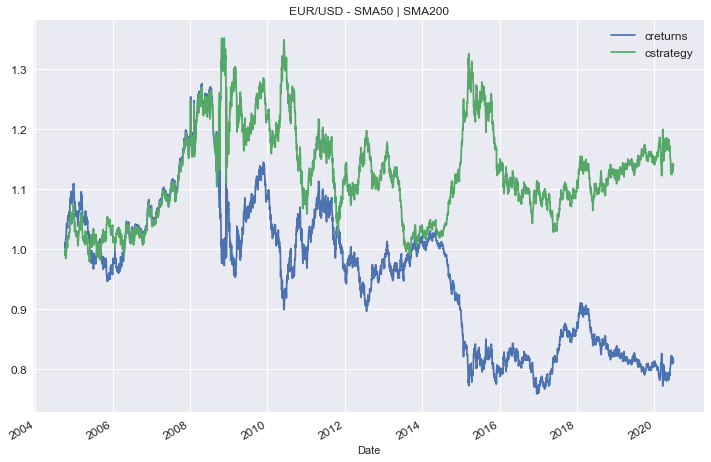

In [60]:
data[["creturns", "cstrategy"]].plot(figsize = (12, 8), title = "EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

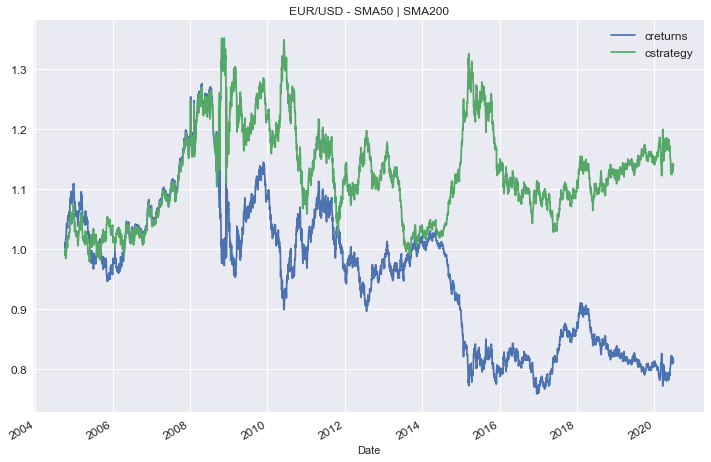

In [61]:
data[["creturns", "cstrategy"]].plot(figsize = (12, 8), title = "EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [62]:
outperf = data.cstrategy.iloc[-1] - data.creturns.iloc[-1]
outperf

0.3258084825207118

## Finding the optimal SMA Strategy

In [ ]:
df = pd.read_csv("eurusd.csv", parse_dates = ["Date"], index_col = "Date")

In [ ]:
df

In [ ]:
def run_strategy(SMA):
    data = df.copy()
    data["returns"] = np.log(data.price.div(data.price.shift(1)))
    data["SMA_S"] = data.price.rolling(int(SMA[0])).mean()
    data["SMA_L"] = data.price.rolling(int(SMA[1])).mean()
    data.dropna(inplace = True)
    
    data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
    data["strategy"] = data.position.shift(1) * data["returns"]
    data.dropna(inplace = True)
    
    
    return data[["returns", "strategy"]].sum().apply(np.exp)[-1]

In [ ]:
run_strategy((50, 200))

In [ ]:
run_strategy((10, 50))

In [ ]:
run_strategy((22, 252))

In [ ]:
def run_strategy(SMA):
    data = df.copy()
    data["returns"] = np.log(data.price.div(data.price.shift(1)))
    data["SMA_S"] = data.price.rolling(int(SMA[0])).mean()
    data["SMA_L"] = data.price.rolling(int(SMA[1])).mean()
    data.dropna(inplace = True)
    
    data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
    data["strategy"] = data.position.shift(1) * data["returns"]
    data.dropna(inplace = True)
    
    
    return -data[["returns", "strategy"]].sum().apply(np.exp)[-1] # maximize absolute performance

In [ ]:
from scipy.optimize import brute

In [ ]:
brute(run_strategy, ((10, 50, 1), (100, 252, 1)))

In [ ]:
-run_strategy((46, 137))

## Trades and Transaction Costs (Part 1)

In [ ]:
data # sma 50/200 strategy

In [ ]:
data.loc[:, "position"].plot(figsize = (12 , 8))
plt.show()

In [ ]:
data.position.diff().fillna(0).abs()

In [ ]:
data["trades"] = data.position.diff().fillna(0).abs()

In [ ]:
data

In [ ]:
data.trades.value_counts()

## Trades and Trading Costs (Part 2)

(simplified approximation for vectorized backtesting)

In [ ]:
spread = 1.5 * 0.0001 # pips == Fourth price decimal
commissions = 0

In [ ]:
half_spread = spread / 2 # absolute tc per trade (position change +-1)
half_spread * 100000

In [ ]:
ptc = half_spread / data.price.mean() # proportional tc per trade (position change +-1)
ptc

In [ ]:
ptc = 0.00007

In [ ]:
data

In [ ]:
data["strategy_net"] = data.strategy - data.trades * ptc

In [ ]:
data["cstrategy_net"] = data.strategy_net.cumsum().apply(np.exp)

In [ ]:
data

In [ ]:
data[["creturns", "cstrategy", "cstrategy_net"]].plot(figsize = (12 , 8))
plt.show()

In [ ]:
data.loc["2020", ["creturns", "cstrategy", "cstrategy_net"]].plot(figsize = (12 , 8))
plt.show()

In [ ]:
raw["returns"] = raw.price.pct_change()

In [ ]:
data["creturns"] = (data["returns"] + 1).cumprod()
data["cstrategy"] = (data["strategy"] + 1).cumprod()

In [63]:
data

,price,SMA_S,SMA_L,position,returns,strategy,creturns,cstrategy
Date,,,,,,,,
2004-10-07,1.229906,1.221840,1.226081,-1,0.001475,-0.001475,1.001475,0.998525
2004-10-08,1.241003,1.222628,1.225995,-1,0.008982,-0.008982,1.010470,0.989557
2004-10-11,1.238405,1.223352,1.225843,-1,-0.002095,0.002095,1.008353,0.991630
2004-10-12,1.232104,1.223888,1.225643,-1,-0.005102,0.005102,1.003208,0.996689
2004-10-13,1.234903,1.224466,1.225497,-1,0.002270,-0.002270,1.005485,0.994427
...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,1.101794,1.103430,-1,0.002892,-0.002892,0.818656,1.128898
2020-06-25,1.125087,1.102486,1.103540,-1,-0.005449,0.005449,0.814195,1.135049
2020-06-26,1.122208,1.103213,1.103627,-1,-0.002562,0.002562,0.812109,1.137957


In [65]:
1.241003 / 1.229906 -1

0.009022640754659417

In [67]:
(1/1.241003) / (1/1.229906) -1

-0.008941960656017822

In [72]:
t0 = 1.1 

In [75]:
t0_s = 1/t0
t0_s

0.9090909090909091

In [76]:
t1 = 1.2

In [78]:
t1_s = 1/t1
t1_s

0.8333333333333334

long

In [79]:
t1 / t0 - 1

0.09090909090909083

In [ ]:
short

In [81]:
t1_s / t0_s - 1

-0.08333333333333326

In [82]:
np.log(t1/t0)

0.08701137698962969

In [83]:
np.log(t1_s/t0_s)

-0.08701137698962969

t0: 100 USD
fx_0 = 1.1 (1.1 USD per 1 EUR)